In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control

### Systems with time delay

The process:

$$ P(s)=\frac{k}{(1+T_1s)}e^{-\tau s} $$

In [3]:
# the Pade approximation
# the time delay (approximated by Pade-approximant)
tau = 1
delay = control.pade(tau, n=3)
H = control.tf(delay[0], delay[1])

# a PT1 system (first order)
k = 1
T1 = 5
PT1 = control.tf(k,[T1, 1])

# first order plus time delay (FOPTD)
P = control.series(PT1, H)

In [4]:
H


-s^3 + 12 s^2 - 60 s + 120
--------------------------
s^3 + 12 s^2 + 60 s + 120

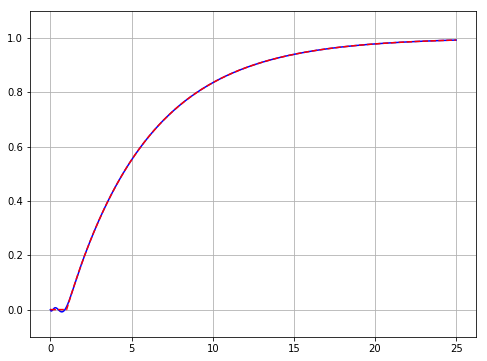

In [5]:
# test the approximation
time = np.linspace(0,25,1000)
t, vt = control.step_response(P, time)
id_vt = k*(1-np.exp(-(t-tau)/T1))*(t>tau) #'ideal' time delay
plt.figure(figsize=(8,6))
plt.plot(t, vt, 'b-'), 
plt.plot(t, id_vt, 'r--'), plt.grid(True)
plt.ylim([-0.1,1.1]);

In [11]:
# Nyquist plot of the pure delay
omega = np.logspace(-4,4,1000)
reH, imH, freq = control.nyquist(H, omega=omega, Plot=False)

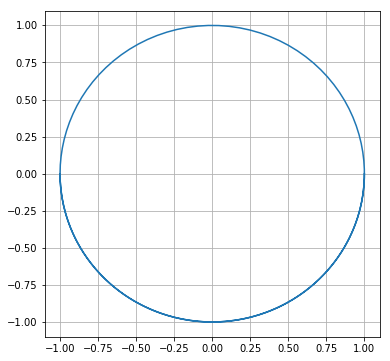

In [12]:
plt.figure(figsize=(6,6))
plt.plot(reH, imH), plt.grid(True);

In [13]:
# Nyquist plot of FOPTD system
omega = np.logspace(-4,4,1000)
reH, imH, freq = control.nyquist(P, omega=omega, Plot=False)

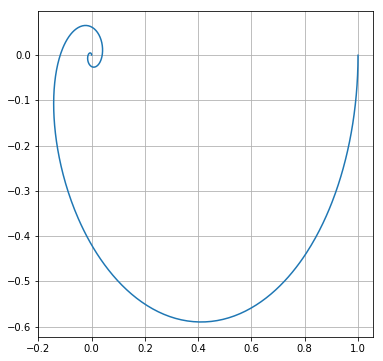

In [14]:
plt.figure(figsize=(6,6))
plt.plot(reH, imH), plt.grid(True);